In [116]:
import geopandas as gpd
from shapely import Polygon, Point
from unidecode import unidecode

In [ ]:
gdf = gpd.read_file('assets/georef-spain-municipio@public.geojson')

In [141]:
gdf[gdf['prov_name'] == 'Santa Cruz de Tenerife'].head(2)

,geo_point_2d,year,acom_code,acom_name,prov_code,prov_name,mun_code,mun_name,mun_area_code,mun_type,mun_name_local,geometry
802,"{'lon': -17.22507359586352, 'lat': 28.16871511...",2022,05,Canarias,38,Santa Cruz de Tenerife,38002,Agulo,ESP,municipality,NaN,"MULTIPOLYGON (((-17.20691 28.19833, -17.20695 ..."
803,"{'lon': -17.166260963880152, 'lat': 28.0968776...",2022,05,Canarias,38,Santa Cruz de Tenerife,38036,San Sebastián de la Gomera,ESP,municipality,NaN,"MULTIPOLYGON (((-17.15620 28.04875, -17.15681 ..."


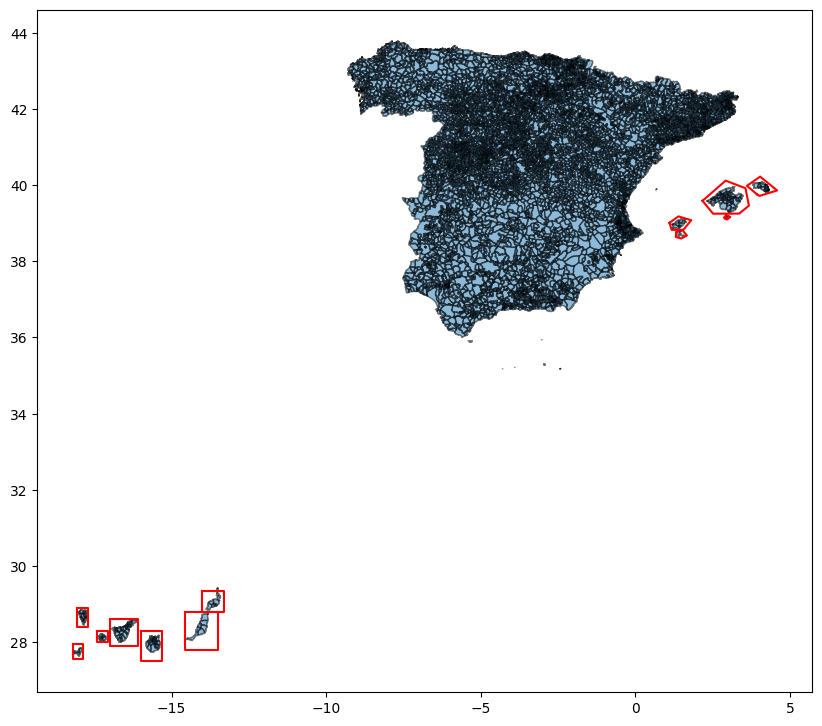

In [196]:
gdf_filter = gdf[['acom_name', 'prov_code', 'prov_name', 'mun_code', 'mun_name', 'geometry']]

#BALEARES
mallorca = Polygon([Point(2.170009, 39.587306), Point(2.509453, 39.249784), Point(3.354951, 39.252498), Point(3.669917, 39.461257), Point(3.557669, 39.918433), Point(2.915797, 40.117771)])
ibiza = Polygon([Point(1.099490, 39.009141), Point(1.387614, 39.179146), Point(1.803970, 39.078804), Point(1.550163, 38.827488), Point(1.171421, 38.824945)])
formentera = Polygon([Point(1.323271, 38.760187), Point(1.392304, 38.81), Point(1.525793, 38.81), Point(1.66468, 38.678430), Point(1.481719, 38.598035), Point(1.303202, 38.637696)])
cabrera = Polygon([Point(2.883902, 39.152352), Point(2.934328, 39.224077), Point(3.066953, 39.162401), Point(2.961774, 39.096483), Point(2.878174, 39.123948)])
menorca = Polygon([Point(3.935713, 39.753131), Point(3.605731, 39.981695), Point(4.031694, 40.223330), Point(4.581211, 39.859889), Point(4.013711, 39.716907)])

#CANARIAS
la_palma = Polygon([Point(-18.05, 28.9), Point(-17.7, 28.9), Point(-17.7, 28.4), Point(-18.05, 28.4)])
el_hierro = Polygon([Point(-18.2, 27.95), Point(-17.85, 27.95), Point(-17.85, 27.55), Point(-18.2, 27.55)])
la_gomera = Polygon([Point(-17.4, 28.3), Point(-17.05, 28.3), Point(-17.05, 28.0), Point(-17.4, 28.0)])
tenerife = Polygon([Point(-17, 28.6), Point(-16.1, 28.6), Point(-16.1, 27.9), Point(-17, 27.9)])
gra_canaria = Polygon([Point(-16, 28.3), Point(-15.3, 28.3), Point(-15.3, 27.5), Point(-16, 27.5)])
fuerteventura = Polygon([Point(-14.55, 28.8), Point(-13.5, 28.8), Point(-13.5, 27.8), Point(-14.55, 27.8)])
lanzarote = Polygon([Point(-14, 29.35), Point(-13.3, 29.35), Point(-13.3, 28.8), Point(-14, 28.8)])

plt = gdf_filter.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.plot(*mallorca.exterior.xy, color='red')
plt.plot(*ibiza.exterior.xy, color='red')
plt.plot(*formentera.exterior.xy, color='red')
plt.plot(*cabrera.exterior.xy, color='red')
plt.plot(*menorca.exterior.xy, color='red')
plt.plot(*la_palma.exterior.xy, color='red')
plt.plot(*el_hierro.exterior.xy, color='red')
plt.plot(*la_gomera.exterior.xy, color='red')
plt.plot(*tenerife.exterior.xy, color='red')
plt.plot(*gra_canaria.exterior.xy, color='red')
plt.plot(*fuerteventura.exterior.xy, color='red')
plt.plot(*lanzarote.exterior.xy, color='red')

In [199]:
gdf_filter['ISLA'] = None

gdf_filter.loc[gdf_filter['geometry'].within(mallorca), 'ISLA'] = 'MALLORCA'
gdf_filter.loc[gdf_filter['geometry'].within(ibiza), 'ISLA'] = 'IBIZA'
gdf_filter.loc[gdf_filter['geometry'].within(formentera), 'ISLA'] = 'FORMENTERA'
gdf_filter.loc[gdf_filter['geometry'].within(cabrera), 'ISLA'] = 'CABRERA'
gdf_filter.loc[gdf_filter['geometry'].within(menorca), 'ISLA'] = 'MENORCA'

gdf_filter.loc[gdf_filter['geometry'].within(la_palma), 'ISLA'] = 'LA PALMA'
gdf_filter.loc[gdf_filter['geometry'].within(el_hierro), 'ISLA'] = 'EL HIERRO'
gdf_filter.loc[gdf_filter['geometry'].within(la_gomera), 'ISLA'] = 'LA GOMERA'
gdf_filter.loc[gdf_filter['geometry'].within(tenerife), 'ISLA'] = 'TENERIFE'
gdf_filter.loc[gdf_filter['geometry'].within(gra_canaria), 'ISLA'] = 'GRAN CANARIA'
gdf_filter.loc[gdf_filter['geometry'].within(fuerteventura), 'ISLA'] = 'FUERTEVENTURA'
gdf_filter.loc[gdf_filter['geometry'].within(lanzarote), 'ISLA'] = 'LANZAROTE'

/home/taniamct/Desktop/Geopandas/env/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [200]:
columns_name = {'acom_name':'COMUNIDAD_AUTONOMA', 'prov_code':'CODIGO_POSTAL_PROVINCIA', 'prov_name':'PROVINCIA', 'mun_code':'CODIGO_POSTAL', 'mun_name':'MUNICIPIO'}

gdf_data_upper = gdf_filter.copy()
gdf_data_without_special_characters = gdf_filter.copy()

gdf_data_upper.rename(columns=columns_name, inplace=True)
gdf_data_without_special_characters.rename(columns=columns_name, inplace=True)

gdf_data_upper['COMUNIDAD_AUTONOMA'] = gdf_data_upper['COMUNIDAD_AUTONOMA'].apply(lambda x: x.upper())
gdf_data_without_special_characters['COMUNIDAD_AUTONOMA'] = gdf_data_without_special_characters['COMUNIDAD_AUTONOMA'].apply(lambda x: unidecode(x).upper())

gdf_data_upper['PROVINCIA'] = gdf_data_upper['PROVINCIA'].apply(lambda x: x.upper())
gdf_data_without_special_characters['PROVINCIA'] = gdf_data_without_special_characters['PROVINCIA'].apply(lambda x: unidecode(x).upper())

gdf_data_upper['MUNICIPIO'] = gdf_data_upper['MUNICIPIO'].apply(lambda x: x.upper())
gdf_data_without_special_characters['MUNICIPIO'] = gdf_data_without_special_characters['MUNICIPIO'].apply(lambda x: unidecode(x).upper())


In [205]:
autonomous_community = gdf_data_upper['COMUNIDAD_AUTONOMA'].unique()
gdf_data_upper.to_file('assets/autonomous_comunity.geojson', driver='GeoJSON')
gdf_data_without_special_characters.to_file('assets/autonomous_comunity_without_special_characters.geojson', driver='GeoJSON')

for i in autonomous_community:
    gdf_data_upper[gdf_data_upper['COMUNIDAD_AUTONOMA'] == i].to_file(f'assets/autonomous_comunity/{unidecode(i).lower()}.geojson', driver='GeoJSON')
    
for i in autonomous_community:
    gdf_data_without_special_characters[gdf_data_without_special_characters['COMUNIDAD_AUTONOMA'] == i].to_file(f'assets/autonomous_comunity_without_special_characters/{unidecode(i).lower()}.geojson', driver='GeoJSON')

/home/taniamct/Desktop/Geopandas/env/lib/python3.10/site-packages/geopandas/io/file.py:539: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/taniamct/Desktop/Geopandas/env/lib/python3.10/site-packages/geopandas/io/file.py:539: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/taniamct/Desktop/Geopandas/env/lib/python3.10/site-packages/geopandas/io/file.py:539: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/taniamct/Desktop/Geopandas/env/lib/python3.10/site-packages/geopandas/io/file.py:539: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this 